## The K-means clusters identified are saved in the cluster excel file - uses random state = 1

# Part 0: Load in Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import localcider
from localcider.sequenceParameters import SequenceParameters
import re
import math
import scipy
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle
import pathlib
from matplotlib import font_manager
from matplotlib.pyplot import gcf


# Setup the fonts
fonts_path = pathlib.Path.home().joinpath('fonts') # i.e. `~/fonts` (update as needed)
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)
print(font_path)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42

COLOR_MAP = dict()
COLOR_MAP['A']         = '#8c8c8c'
COLOR_MAP['CHNQST']    = '#077a15'
COLOR_MAP['DE']        = '#e23a36'
COLOR_MAP['FWY']       = '#f58220'
COLOR_MAP['G']         = '#86bd8d'
COLOR_MAP['ILMV']      = '#231f20'
COLOR_MAP['KR']        = '#1725c2'
COLOR_MAP['P']         = '#c25fc9'


# Using the global color map, we convert the colormap of amino acid
# groups, to a map against individual amino acids. This
# serves as our internal color map which is used for styling.
aacolor_map=dict()
for amino_acids in COLOR_MAP:
    for amino_acid in amino_acids:
        aacolor_map[amino_acid] = COLOR_MAP[amino_acids]

/home/research/kiersten.ruff/fonts/ARIAL.TTF


# Part 1: Load in IDRome Data

## 1.1 - Load in All Sapiens Disordered Stretches >=30

In [2]:
# uses nardini_env
import pandas as pd
import seaborn as sbn

speciesname='sapiens'

# Gene names table
mapdf=pd.read_table('data/sapiens_uniprot_gene_name.tsv')
accsmap=mapdf['Uniprot'].tolist()
genesmap=mapdf['Gene'].tolist()

myseqs=[]
fullaccswnums=[]
goodidxs=[]
badidxs=[]
fullaccs=[]
mygenes=[]
seqlens=[]

myfile = open('data/idrs_min_length_30/'+speciesname, 'r')
Lines = myfile.readlines()

count=0
for line in Lines:
    count=count+1
    fullline=line.split(" ")
    tmpseq=fullline[3]
    tmpacc=fullline[0]
    currseq=tmpseq.strip('\n')
    
    if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
        myseqs.append(currseq)
        fullaccswnums.append(tmpacc)
        goodidxs.append(count)
        seqlens.append(len(currseq))
        tmp=tmpacc.split("_")
        fullaccs.append(tmp[0])
        if tmp[0] in accsmap:
            currgidx=accsmap.index(tmp[0])
            mygenes.append(genesmap[currgidx]+' IDR'+tmp[1])
        else:
            mygenes.append(tmp[0]+' IDR'+tmp[1])
    else:
        badidxs.append(count)
        
print(len(myseqs))
print(count)
print(len(goodidxs))
print(badidxs)
#print(mygenes)

24508
24535
24508
[337, 338, 5387, 7965, 8270, 8860, 9309, 13434, 18343, 20894, 20895, 20896, 20897, 20898, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 21628, 22016, 23960]


## 1.2 - Load NARDINI data for all sapiens IDRs gte 30

In [3]:
import numpy as np
zvec=np.load('data/'+speciesname+'_full_idrome_gte_30_nardini.npy')
#print(zvec)

# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvec[idx])
print(zvec[idx][21])
print(len(zvec))

myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','R/K Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Patch','C Patch','D Patch','E Patch','F Patch','G Patch','H Patch','I Patch','K Patch','L Patch','M Patch','N Patch','P Patch','Q Patch','R Patch','S Patch','T Patch','V Patch','Y Patch','RG Frac']

myfeatnardini=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']

print(len(myfeat))

MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[10.59108354  0.          0.          0.          0.         11.65941098
  0.         14.39589484  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  5.76110201  0.          7.43819192  0.          0.          7.20103122]
0.0
24508
90


## 1.3 - Get all compositional sequence features the sapiens IDRome

[0.07741329870246792, 0.008538805724799583, 0.05127727736370751, 0.09008763614629162, 0.014270327223274142, 0.08332631606660568, 0.023213564275380197, 0.01785675831127527, 0.06098073687889461, 0.05867819723550179, 0.016164841817388885, 0.030837123165538154, 0.11307352429649098, 0.05451395702245792, 0.06577801431451794, 0.12502566544640797, 0.05722109753347246, 0.03588171932609476, 0.005580771458323423, 0.010280367691109179, 0.12675875119341254, 0.14136491350999913, 0.38267652923466194, 0.20599481539272863, 0.030131466372706743, 0.05493351039784072, 0.1841411803139005, 0.3811971889999026, 0.26812366470341165, -0.01460616231658658, 3.4110708906101537, 0.8019110880466948, 7.44443247900792, 0.4044778171527079, 0.013228570102474755, 2.8313019279589203e-06, 0.00565433376114803, 0.024103760059206916, 1.1039838114785175e-05, 0.023394616782112673, 0.0014528601714245697, 1.625241407649792e-05, 0.012782162346973061, 0.0011648168919885275, 9.498442431682362e-05, 0.0008614367526042599, 0.0403653516

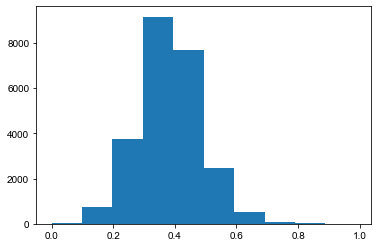

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
import re

numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block

aas='ACDEFGHIKLMNPQRSTVY' # For pathces - no W patch in proteome so this is removed
#aas='CEK'

filename=[speciesname]

for fname in filename:
    myfile = open('../general_data/idrs_min_length_30/'+fname, 'r')
    Lines = myfile.readlines()
    fracA=[]
    fracC=[]
    fracD=[]
    fracE=[]
    fracF=[]
    fracG=[]
    fracH=[]
    fracI=[]
    fracK=[]
    fracL=[]
    fracM=[]
    fracN=[]
    fracP=[]
    fracQ=[]
    fracR=[]
    fracS=[]
    fracT=[]
    fracV=[]
    fracW=[]
    fracY=[]
    fracpos=[]
    fracneg=[]
    fracpol=[]
    fracali=[]
    fracaro=[]
    fracRtoK=[]
    fracEtoD=[]
    fracexp=[]
    fcr=[]
    ncpr=[]
    mhydro=[]
    dispro=[]
    isopoi=[]
    ppii=[]
    fracpatch=[[] for _ in range(len(aas))]
    rgpatch=[]
    
    for line in Lines:
        fullline=line.split(" ")
        tmpseq=fullline[3]
        currseq=tmpseq.strip('\n')

        if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
            SeqOb = SequenceParameters(currseq)
            slen=SeqOb.get_length()
            aafrac=SeqOb.get_amino_acid_fractions()
            
            fracexp.append(SeqOb.get_fraction_expanding())
            fcr.append(SeqOb.get_FCR())
            ncpr.append(SeqOb.get_NCPR())
            mhydro.append(SeqOb.get_mean_hydropathy())
            dispro.append(SeqOb.get_fraction_disorder_promoting())
            isopoi.append(SeqOb.get_isoelectric_point())
            ppii.append(SeqOb.get_PPII_propensity(mode='hilser'))

            ## AA Fractions
            fracA.append(aafrac['A'])
            fracC.append(aafrac['C'])
            fracD.append(aafrac['D'])
            fracE.append(aafrac['E'])
            fracF.append(aafrac['F'])
            fracG.append(aafrac['G'])
            fracH.append(aafrac['H'])
            fracI.append(aafrac['I'])
            fracK.append(aafrac['K'])
            fracL.append(aafrac['L'])
            fracM.append(aafrac['M'])
            fracN.append(aafrac['N'])
            fracP.append(aafrac['P'])
            fracQ.append(aafrac['Q'])
            fracR.append(aafrac['R'])
            fracS.append(aafrac['S'])
            fracT.append(aafrac['T'])
            fracV.append(aafrac['V'])
            fracW.append(aafrac['W'])
            fracY.append(aafrac['Y'])

            ## AA Physicochemical properties
            fracpos.append(aafrac['K']+aafrac['R'])
            fracneg.append(aafrac['D']+aafrac['E'])
            fracpol.append(aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])
            fracali.append(aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])
            fracaro.append(aafrac['F']+aafrac['W']+aafrac['Y'])
            
            ## AA ratios
            fracRtoK.append(np.log10(((slen*aafrac['R'])+1)/((slen*aafrac['K'])+1)))
            fracEtoD.append(np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1)))
            
            ## Fraction of sequence containing patches
            counta=-1
            for a in aas:
                counta=counta+1
                justKs='0'*len(currseq) # Set string of zeros

                pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

                # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
                pos2=pos
                for p in range(0,len(pos)-1):
                    tdi=pos[p+1]-pos[p]
                    if tdi > 1 and tdi<=numInt+1:
                        myt=list(range(pos[p]+1,pos[p+1]))
                        for item in myt:
                            pos2.append(item)


                # For positions make those 1 in string of zeros   
                justKs = list(justKs)
                for p in pos2:
                    justKs[p]='1'
                justKs = ''.join(justKs)


                the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
                idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

                numpatches=0
                count=-1
                patchescombined=''
                for o in the_ones:
                    count=count+1
                    myrange=idx_ones[count] # Get indices for each consecutive strength
                    subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                    pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
                    # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
                    if len(pos3)>=minBlockLen:
                        numpatches=numpatches+1
                        patchescombined+=subseq

                fracpatch[counta].append(len(patchescombined)/len(currseq))
                
            ## Fraction of sequence in RG stretch
            justKs='0'*len(currseq) # Set string of zeros
            pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

            # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
            pos2=pos
            for p in range(0,len(pos)-1):
                tdi=pos[p+1]-pos[p]
                if tdi > 1 and tdi<=numInt+1:
                    myt=list(range(pos[p]+1,pos[p+1]))
                    for item in myt:
                        pos2.append(item)

            # For positions make those 1 in string of zeros             
            justKs = list(justKs)
            for p in pos2:
                justKs[p]='1'
            justKs = ''.join(justKs)

            the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
            idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

            count=-1
            patchescombined=''
            for o in the_ones:
                count=count+1
                myrange=idx_ones[count] # Get indices for each consecutive strength
                subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                pos3=subseq.count('RG')
                #print(subseq)
                if pos3>=2:
                    patchescombined+=subseq

            rgpatch.append(len(patchescombined)/len(currseq))

    meanvals_sapiens=[np.mean(fracA), np.mean(fracC), np.mean(fracD), np.mean(fracE), np.mean(fracF), np.mean(fracG), np.mean(fracH), np.mean(fracI), np.mean(fracK), np.mean(fracL), np.mean(fracM), np.mean(fracN), np.mean(fracP), np.mean(fracQ), np.mean(fracR), np.mean(fracS), np.mean(fracT), np.mean(fracV), np.mean(fracW), np.mean(fracY), np.mean(fracpos), np.mean(fracneg), np.mean(fracpol), np.mean(fracali), np.mean(fracaro), np.mean(fracRtoK), np.mean(fracEtoD), np.mean(fracexp), np.mean(fcr), np.mean(ncpr), np.mean(mhydro), np.mean(dispro), np.mean(isopoi), np.mean(ppii)]
    stdvals_sapiens=[np.std(fracA), np.std(fracC), np.std(fracD), np.std(fracE), np.std(fracF), np.std(fracG), np.std(fracH), np.std(fracI), np.std(fracK), np.std(fracL), np.std(fracM), np.std(fracN), np.std(fracP), np.std(fracQ), np.std(fracR), np.std(fracS), np.std(fracT), np.std(fracV), np.std(fracW), np.std(fracY), np.std(fracpos), np.std(fracneg), np.std(fracpol), np.std(fracali), np.std(fracaro), np.std(fracRtoK), np.std(fracEtoD), np.std(fracexp), np.std(fcr), np.std(ncpr), np.std(mhydro), np.std(dispro), np.std(isopoi), np.std(ppii)]
    
    for a in fracpatch:
        meanvals_sapiens.append(np.mean(a))
        stdvals_sapiens.append(np.std(a))
    
    meanvals_sapiens.append(np.mean(rgpatch))
    stdvals_sapiens.append(np.std(rgpatch))
    

    print(meanvals_sapiens)
    print(stdvals_sapiens)
    print(len(rgpatch))
    print(len(fracA))
    print(np.mean(rgpatch))
    print(np.std(rgpatch))
    
    
    plt.hist(fracpol)

## 1.4 - Add non-patterning features to feature vector

In [5]:
# Remove the number of the IDR in the full human IDRome accession list
fullacc=fullaccs
    
typeall=['pol','hyd','pos','neg','aro','ala','pro','gly']
zvecaa=np.zeros((len(myseqs),int(len(typeall)+(len(typeall)*(len(typeall)-1))/2)+34+len(aas)+1))
tmp=zvec

countseq=-1
for currseq in myseqs:
    countseq=countseq+1
    tmpacc=fullacc[countseq]
    SeqOb = SequenceParameters(currseq)
    
    slen=SeqOb.get_length()
    aafrac=SeqOb.get_amino_acid_fractions()
    
    fracexp=SeqOb.get_fraction_expanding()
    fcr=SeqOb.get_FCR()
    ncpr=SeqOb.get_NCPR()
    mhydro=SeqOb.get_mean_hydropathy()
    dispro=SeqOb.get_fraction_disorder_promoting()
    isopoi=SeqOb.get_isoelectric_point()
    ppii=SeqOb.get_PPII_propensity(mode='hilser')
    
    tmpseq=[]
    
    ## AA Fractions
    afA=np.array((aafrac['A']-meanvals_sapiens[0])/stdvals_sapiens[0])
    tmpseq.append(afA)
    afC=np.array((aafrac['C']-meanvals_sapiens[1])/stdvals_sapiens[1])
    tmpseq.append(afC)
    afD=np.array((aafrac['D']-meanvals_sapiens[2])/stdvals_sapiens[2])
    tmpseq.append(afD)
    afE=np.array((aafrac['E']-meanvals_sapiens[3])/stdvals_sapiens[3])
    tmpseq.append(afE)
    afF=np.array((aafrac['F']-meanvals_sapiens[4])/stdvals_sapiens[4])
    tmpseq.append(afF)
    afG=np.array((aafrac['G']-meanvals_sapiens[5])/stdvals_sapiens[5])
    tmpseq.append(afG)
    afH=np.array((aafrac['H']-meanvals_sapiens[6])/stdvals_sapiens[6])
    tmpseq.append(afH)
    afI=np.array((aafrac['I']-meanvals_sapiens[7])/stdvals_sapiens[7])
    tmpseq.append(afI)
    afK=np.array((aafrac['K']-meanvals_sapiens[8])/stdvals_sapiens[8])
    tmpseq.append(afK)
    afL=np.array((aafrac['L']-meanvals_sapiens[9])/stdvals_sapiens[9])
    tmpseq.append(afL)
    afM=np.array((aafrac['M']-meanvals_sapiens[10])/stdvals_sapiens[10])
    tmpseq.append(afM)
    afN=np.array((aafrac['N']-meanvals_sapiens[11])/stdvals_sapiens[11])
    tmpseq.append(afN)
    afP=np.array((aafrac['P']-meanvals_sapiens[12])/stdvals_sapiens[12])
    tmpseq.append(afP)
    afQ=np.array((aafrac['Q']-meanvals_sapiens[13])/stdvals_sapiens[13])
    tmpseq.append(afQ)
    afR=np.array((aafrac['R']-meanvals_sapiens[14])/stdvals_sapiens[14])
    tmpseq.append(afR)
    afS=np.array((aafrac['S']-meanvals_sapiens[15])/stdvals_sapiens[15])
    tmpseq.append(afS)
    afT=np.array((aafrac['T']-meanvals_sapiens[16])/stdvals_sapiens[16])
    tmpseq.append(afT)
    afV=np.array((aafrac['V']-meanvals_sapiens[17])/stdvals_sapiens[17])
    tmpseq.append(afV)
    afW=np.array((aafrac['W']-meanvals_sapiens[18])/stdvals_sapiens[18])
    tmpseq.append(afW)
    afY=np.array((aafrac['Y']-meanvals_sapiens[19])/stdvals_sapiens[19])
    tmpseq.append(afY)
    
    ## AA Physicochemical properties
    afpos=np.array(((aafrac['K']+aafrac['R'])-meanvals_sapiens[20])/stdvals_sapiens[20])
    tmpseq.append(afpos)
    afneg=np.array(((aafrac['D']+aafrac['E'])-meanvals_sapiens[21])/stdvals_sapiens[21])
    tmpseq.append(afneg)
    afpol=np.array(((aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])-meanvals_sapiens[22])/stdvals_sapiens[22])
    tmpseq.append(afpol)
    afali=np.array(((aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])-meanvals_sapiens[23])/stdvals_sapiens[23])
    tmpseq.append(afali)
    afaro=np.array(((aafrac['F']+aafrac['W']+aafrac['Y'])-meanvals_sapiens[24])/stdvals_sapiens[24])
    tmpseq.append(afaro)
    
    ## AA ratios
    afRK=np.array((np.log10(((slen*aafrac['R'])+1)/((slen*aafrac['K'])+1))-meanvals_sapiens[25])/stdvals_sapiens[25])
    tmpseq.append(afRK)
    afED=np.array((np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1))-meanvals_sapiens[26])/stdvals_sapiens[26])
    tmpseq.append(afED)
    
    ## Charge measures
    afexp=np.array((fracexp-meanvals_sapiens[27])/stdvals_sapiens[27])
    tmpseq.append(afexp)
    afcr=np.array((fcr-meanvals_sapiens[28])/stdvals_sapiens[28])
    tmpseq.append(afcr)
    ancpr=np.array((ncpr-meanvals_sapiens[29])/stdvals_sapiens[29])
    tmpseq.append(ancpr)
    
    ## Miscellaneous measures
    amhydro=np.array((mhydro-meanvals_sapiens[30])/stdvals_sapiens[30])
    tmpseq.append(amhydro)
    adispro=np.array((dispro-meanvals_sapiens[31])/stdvals_sapiens[31])
    tmpseq.append(adispro)
    aisopoi=np.array((isopoi-meanvals_sapiens[32])/stdvals_sapiens[32])
    tmpseq.append(aisopoi)
    appii=np.array((ppii-meanvals_sapiens[33])/stdvals_sapiens[33])
    tmpseq.append(appii)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in aas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq

        afracpatch=(len(patchescombined)/len(currseq))
        afracp=np.array((afracpatch-meanvals_sapiens[33+counta+1])/stdvals_sapiens[33+counta+1])
        tmpseq.append(afracp)
    
    ## Fraction of sequence in RG stretch
    justKs='0'*len(currseq) # Set string of zeros
    pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

    # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
    pos2=pos
    for p in range(0,len(pos)-1):
        tdi=pos[p+1]-pos[p]
        if tdi > 1 and tdi<=numInt+1:
            myt=list(range(pos[p]+1,pos[p+1]))
            for item in myt:
                pos2.append(item)

    # For positions make those 1 in string of zeros             
    justKs = list(justKs)
    for p in pos2:
        justKs[p]='1'
    justKs = ''.join(justKs)

    the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
    idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

    count=-1
    patchescombined=''
    for o in the_ones:
        count=count+1
        myrange=idx_ones[count] # Get indices for each consecutive strength
        subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
        pos3=subseq.count('RG')
        if pos3>=2:
            patchescombined+=subseq

    arg=(len(patchescombined)/len(currseq))
    argp=np.array((arg-meanvals_sapiens[33+counta+2])/stdvals_sapiens[33+counta+2])
    tmpseq.append(argp)
    
    zvecaa[countseq,:]=np.append(tmp[countseq,:],tmpseq)
    #print(np.append(zvecaa[countseq,:],afA))
    #print((zvecaa))
    
    
print(np.shape(zvecaa))

# check vector
idx=fullaccswnums.index('Q8NFD5_1')
print(myseqs[idx])
print(zvecaa[idx])


(24508, 90)
MAHNAGAAAAAGTHSAKSGGSEAALKEGGSAAALSSSSSSSAAAAAASSSSSSGPGSAMETGLLPNHKLKTVGEAPAAPPHQQHHHHHHAHHHHHHAHHLHHHHALQQQLNQFQQQQQQQQQQQQQQQQQQHPISNNNSLGGAGGGAPQPGPDMEQPQHGGAKDSAAGGQADPPGPPLLSKPGDEDDAPPKMGEPAGGRYEHPGLGALGTQQPPVAVPGGGGGPAAVPEFNNYYGSAAPASGGPGGRAGPCFDQHGGQQSPGMGMMHSASAAAAGAPGSMDPLQNSHEGYPNSQCNHYPGYSRPGAGGGGGGGGGGGGGSGGGGGGGGAGAGGAGAGAVAAAAAAAAAAAGGGGGGGYGGSSAGYGVLSSPRQQGGGMMMGPGGGGAASLSKAAAGSAAGGFQRFAGQNQHPSGATPTLNQLLTSPSPMMRSYGGSYPEYSSPSAPPPPPSQPQSQAAAAGAAAGGQQAAAGMGLGKD
[ 1.05910835e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.16594110e+01  0.00000000e+00  1.43958948e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.76110201e+00  0.00

# Part 2: Get and Analyze IDR clusters

## 2.1 - Get IDR accessions and sequences of a given length

In [7]:
# Get all IDRs of length between 100 - 300
minlength=100
maxlength=300
allidx_sub=[i for i,v in enumerate(seqlens) if minlength <= v <= maxlength]


genenames=[]
genenamesIDRnum=[]
accs_sub=[]
currseqs=[]
curraccwnum=[]
for i in allidx_sub:
    curracc=fullaccs[i]
    
    # Get gene names with IDR number
    genenamesIDRnum.append(mygenes[i])
    #print(genenamesIDRnum)
    #print(myseqs[i])
    #print(seqlens[i])
    
    # Get gene names
    tmp=mygenes[i].split(' ')
    genenames.append(tmp[0])
    #print(genenames)
    
    # Get accessions
    accs_sub.append(fullaccs[i])
    
    # Get sequences
    currseqs.append(myseqs[i])
    
    # Get accessions with IDR numbers
    curraccwnum.append(fullaccswnums[i])
    
    #with open('IDR_'+str(minlength)+'_'+str(maxlength)+'.fasta', 'a') as f:
    #    f.write('>'+mygenes[i]+'\n')
    #    f.write(myseqs[i]+'\n')

    
print(genenames)
print(genenamesIDRnum)
print(len(genenamesIDRnum))


['PPP4R3B', 'MEPE', 'MEPE', 'TCEAL5', 'FLG', 'TNRC6B', 'TNRC6B', 'TNRC6B', 'STON2', 'TAF1C', 'ARHGAP39', 'ARHGAP39', 'CDK16', 'E2F3', 'SUGP2', 'PBX2', 'FAT3', 'ARHGEF26', 'SPECC1', 'SPECC1', 'FAM221B', 'ANKRD20A3P', 'KCNH4', 'HUWE1', 'HUWE1', 'Q6ZTI0', 'TRIM44', 'ARIH2OS', 'COL20A1', 'Q8N6K4', 'JARID2', 'JARID2', 'JARID2', 'KAT2A', 'ATXN3L', 'EDA', 'PHIP', 'PPFIBP1', 'HDAC1', 'DHX8', 'SNRK', 'ADAMTS12', 'BBC3', 'MNDA', 'TRPS1', 'ETV6', 'PACS2', 'H1-10', 'FAM102A', 'ZXDC', 'MARK3', 'MUC19', 'MUC19', 'MUC19', 'MUC19', 'MLXIP', 'TONSL', 'TONSL', 'POM121', 'POM121', 'PHACTR2', 'PHACTR2', 'CDT1', 'NPHP4', 'GPATCH8', 'DENND1A', 'DENND1A', 'DENND1A', 'FRY', 'IGF2-AS', 'KNDC1', 'PPP1R13L', 'CENPT', 'NRG1', 'NRG1', 'NFIB', 'TNRC18', 'TNRC18', 'TNRC18', 'TNRC18', 'MYBBP1A', 'WDR91', 'COL26A1', 'MAGEB1', 'ZSCAN21', 'TAF1', 'FAM83H', 'ZNF512B', 'CENPC', 'CENPC', 'NACAD', 'MCF2L', 'GARRE1', 'ZBTB5', 'SYNM', 'ZBTB38', 'MUC5B', 'MUC5B', 'MUC5B', 'LOC729421', 'PTPN18', 'RGS3', 'NUP153', 'FXR2', 'FXR1'

## 2.2 - Load in clusters from excel file

In [8]:
numkclusts=30

tmpgenelistclust=[]
tmpacclistbyclust=[]
allgenesIDRnum=[]
allaccsIDRnum=[]
allclusters=[]
for c in range(0,numkclusts):
    tmpdf=pd.read_excel('data/IDR_100_300_kmeans_30_clusters_v2.xlsx',sheet_name='cluster_'+str(c))

    tmpgenelistclust.append(tmpdf['Genes'].tolist())
    tmpacclistbyclust.append(tmpdf['Uniprot'].tolist())
    
    tmpgenes=tmpdf['Genes'].tolist()
    tmpaccs=tmpdf['Uniprot'].tolist()
    
    #print('Cluster_'+str(c))
    #print(len(tmpgenes))
    
    for g in range(0,len(tmpgenes)):
        if tmpgenes[g][0]=='*':
            allgenesIDRnum.append(tmpgenes[g][1:])
        else:
            allgenesIDRnum.append(tmpgenes[g])
        allaccsIDRnum.append(tmpaccs[g])
        allclusters.append(c)

print(len(allgenesIDRnum))
print(len(genenamesIDRnum))
#print(allclusters)

#pos=[i for i, ltr in enumerate(allgenesIDRnum) if ltr == 'WASHC2A IDR2']
#for p in pos:
#    print(allaccsIDRnum[p])


for element in allgenesIDRnum:
    if element not in genenamesIDRnum:
        print(element)
        
clusters=[]
for g in curraccwnum:
    idx=[i for i, ltr in enumerate(allaccsIDRnum) if ltr == g]
    if len(idx)>1:
        print(g)
        print(idx)
        hi
    clusters.append(allclusters[idx[0]])
    
#print(clusters)
#print(curraccwnum)
#hi

genelistclust=[]
listclust=[]
acclistbyclust=[]
for c in range(0,numkclusts):
    print('Cluster_'+str(c))
    pos=[i for i, ltr in enumerate(clusters) if ltr == c]
    #print(pos)
    print(len(pos))

    acclist=[]
    seqlist=[]
    genelist=[]
    for p in pos: 
        acclist.append(curraccwnum[p])
        seqlist.append(currseqs[p])
        genelist.append(genenamesIDRnum[p])
        genelistclust.append(genenamesIDRnum[p])
        listclust.append(c)
        #print(p)
        #print(curraccwnum[p])
        print(genenamesIDRnum[p])
        print(c)
        print(currseqs[p])

    acclistbyclust.append(acclist)

4529
4529
Cluster_0
110
CDK16 IDR1
0
MDRMKKIKRQLSMTLRGGRGIDKTNGAPEQIGLDESGGGGGSDPGEAPTRAAPGELRSARGPLSSAPEIVHEDLKMGSDGESDQASATSSDEVQSPVRVRMRNHPPRKISTEDINK
E2F3 IDR1
0
TTSCSSSLQSGAVAAGPLLPSAPGAEQTAGSLLYTTPHGPSSRAGLLQQPPALGRGGSGGGGGPPAKRRLELGESGHQYLSDGLKTPKGKGRAALRSPDSPKTPKSPSEKTRYD
WDR91 IDR1
0
QRNASLSQSPRVGFLSSLLPQSKKSPSRLSPAQGPPQPQSSAKKESFGGQGTKGKDPTSGAKDGKSLLSGLATGESGWSQHRQRRLQDHGKERKELFSTTTSQCAEKKPEASGPEAEPCPELHTEPVEPLTRASSAGPEGGGVRPEQPFI
FXR1 IDR1
0
LRQIGSRSYSGRGRGRRGPNYTSGYGTNSELSNPSETESERKDELSDWSLAGEDDRDSRHQRDSRRRPGGRGRSVSGGRGRGGPRGGKSSISSVLKDPDSNPYSLLDNTESDQTADTDASESHHSTNRRRRSRRRRTDEDAVLMDGMTESDTASVNENG
ZNF831 IDR2
0
KHRRTQTHLNNSRLSSESEGAGGGLLEEGDKAGEPPRPEGRGESRCQGMHEGASERPLSPGAHVPLLAKNLDVRTEAAPCPGSAFADREAPWDSAPMASPGLPAASTQPWRKLPEQKSPTAGKPCALQRQQATAAEKPWDAKAPEGRLRKCESTDSGYLSRSDSAEQPHAPCSPLHSLSEHSAESEGEGGPGPGPGVAGAEPGAREAGLELEKKRLE
TSEN54 IDR1
0
DASVQHLEDGDGKRKRSSSSPRSINKKAKALDNSLQPKSLAASSPPPCSQPSQCPEEKPQESSPMKGPGGPFQLLGSLGPSPGPAREGVGCSWESGRAENGVTGAGK
NAB2 IDR2
0
TAGTRKGSMSNGHGSPG

JMJD1C IDR8
4
SNKISLCMPESQQQNTPPKSEKNGGSSPESDVGTDNKLTPPESQSPLHWLADLAEQKAREEKKENKELTLENQIKEEREQDNSESPNGRTSPLVSQNNEQGSTLRDL
RABGAP1L IDR1
4
FVLVPQYADDNSTKHEEKPQLKIVSNGDEQLEKAMEEILRDSEKRPSSLLVDCQSSSEISDHSFGDIPASQTNKPSLQLILDPSNTEISTPRPSSPGGLPEE
NCOA7 IDR3
4
ASEKDINPFSKFKSINKEKRQQNGEKIMTSDSRPIVPLEKSTGHTPTKPSGSSVSEKLKKLDSSRETSHGSPTVTKLSKEPSDTSSAFESTAKENFLGEDDDFVDLEELSSQTGGGMHKKDT
EXPH5 IDR3
4
KTSFSQISDDRRNPQSPNLQNPTVTLQKIFPNKPASHPMRSHTEVTVTSSNSVDSLPLAKSQPNILVTEVNNEKDLNESISEEDKQLSKMDQTNKAGEIPQPVSQTGISNSLPDFQNPLSQDSA
EXPH5 IDR4
4
DSLDLSSAALPDSSPSKNSSLDAPVVPSTTVFSRRSPSDKDPSLGEREEKDNAGKNQKNQFIVSHSENQERNDSPVPTHDEVVDVKCHSHSPFRNERGKGKI
FAM13A IDR2
4
HKNTFGCAGERSKPKRQKSSTKLSELHDNQDGLVNMESLNSTRSHERTGPDDFEWMSDERKGNEKDGGHTQHFESPTMKIQEHPSLSDTKQQRNQDAGDQEESFVSEVPQSD
ARHGAP12 IDR1
4
NLSLDLTHNNGKFNNDSHSPKVSSQNRTRSFGHFPGPEFLDVEKTSFSQEQSCDSAGEGSERIHQDSESGDELSSSSTEQIRATTPPNQGRPDSPVYANLQELKISQSALPPLPGSP
NRK IDR5
4
PPEEDGDYVELYDASADTDGDDDDESNDTFEDTYDHANGNDDLDNQVDQANDVCKDHDDDNNKFVDDVNNNYYEAPSCPRASYGRDGSCKQDGYDGS

RFSHSGSYSQHMNHRYSYCKREAEEREAAEREAREKGHLEPTELLMNRAYLQSITPQGYSDSEERESMPRDGESEKEHEKEGEDGYGKLGRQDGDEEFEEEEEESENKSMDTDPETIRDEEETGDHSMDDSSEDGKMETKSDHEEDNMEDGM
NBPF4 IDR1
7
NKHLKTLLTPDDPDKSQGQDLREQLAEGHRLAEHLVHKLSPENDEDEDEDEDDKDEEVEKVQESPAPREVQKTEEKEVPQDSLEECAVTCSNSHNPSNSNQPHRSTKITFKEHEVDSALVVESEHPHDEEEEALNIPPENQNDHEEEEGKAPVPPRHHDKSNSYRHREV
NBPF20 IDR4
7
LVQKLSPENDNDDNEDVQVEVAEKVQKSSAPREMQKAEEKEVPEDSLEECAITYSNSHGPYDSNQPHRKTKITFEEDKVDSTLIGSSSHVEREDAVHIIPENESDDEEEEEKGPVSPRNLQESEEEEVPQESWDEGYSTPSIPPE
PHRF1 IDR1
7
MDDDSLDELVARSPGPDGHPQVGPADPAGDFEESSVGSSGDSGDDSDSEHGDGTDGEDEGASEEEDLEDRSGSEDSEDDGETLLEVAGTQGKLEAAGSFNSDDD
PRKCSH IDR3
7
KYRSEALPTDLPAPSAPDLTEPKEEQPPVPSSPTEEEEEEEEEEEEEAEEEEEEEDSEEAPPPLSPPQPASPAEEDKMPPYDEQTQAFIDAAQEARNKFEEAERSLKDME
PCM1 IDR14
7
RILEDHGSPAGEIDDEDKDKDETETVKQTQTSEVYDGPKNVRSDISDQEEDEESEGCPVSINLSKAETQALTNYGSGEDENEDEEMEEFEEGPVDVQTSLQANTEATEENEHDEQVLQRDFKKTAESKNVPLEREATSKNDQNNCPVK
EID1 IDR1
7
MSEMAELSELYEESSDLQMDVMPGEGDLPQMEVGSGSRELSLRPSRSGAQQLEEEGPMEEEEAQPMAAPEGKRSLANGPNAGEQPGQ

13
PNVNALTHENQTKPSISQISTTLPPTTSTKKSGGASVVPHPSPTPLSQEEADNNEDPSIEEEDLLMLNSSPSTAKDTLDNGDYGEPDYDWTTGPRDDDESDDTLEEN
PSD IDR3
13
SLDPPSSGAKPPEQAPPSPPGVGSRQGSGVAVGRAAKYSETDLDTVPLRCYRETDIDEVLAEREEADSAIESQPSSEGPPGTAYPPAPRPGPLPGPHPSLGSGNEDEDDDEAGGEEDVDDEVFEASEGARPGSRMPLKSPVPFLPGTSPSADGPDSFSC
PSD IDR4
13
AKGTSYTSLASLEALASPGPTQSPFFTFELPPQPPAPRPDPPAPAPLAPLEPDSGTSSAADGPWTQRGEEEEAEARAKLAPGREPPSPCHSEDSLGLGAAPLGSEPPLSQLVSDSDSELDSTERLALGSTDTLSNGQKA
PAK1 IDR2
13
TSNSQKYMSFTDKSAEDYNSSNALNVKAVSETPAVPPVSEDEDDDDDDATPPPVIAPRPEHTKSVYTRSVIEPLPVTPTRDVATSPISPTENNTTPPDALTRNTEKQKKKPKMSDE
RILP IDR3
13
RKKIKAKMLGTPEEAESSEDEAGPWILLSDDKGDHPPPPESKIQSFFGLWYRGKAESSEDETSSPAPSKLGGEEEAQPQSPAPDPPCSALHEHLCLGASAAPEA
WNK4 IDR5
13
SLLSPSPGLLSQSPPAPPSPLPSLPLPPPVAPGGQESPSPHTAEVESEASPPPARPLPGEARLAPISEEGKPQLVGRFQVTSSKEPAEPLPLQPTSPTLSGSPKPSTPQLTSESSDTEDSAGGGPETREALAESDRAAEGLGAGVEEEGDDGKEPQVGGSPQPLSHPSPVWMNYSYSSLCLSSEESESSGEDEEFWAEL
MAP4K2 IDR2
13
GSLLQSVQEALEERSLTIRSASEFQELDSPDDTMGTIKRAPFLGPLPTDPPAEEPLSSPPGTLPPPPSGPNSSPLLPTAWATMKQREDP

ISSSVKATSPVKSTTSITDAKSCEGQNPELLPKTPISPLKTGVSKPIVKSTLSQTVPSKGELSREICLQSQSKDKSTTPGGTGIKPFLERFGERCQEHSKESPARSTPHRTPIITPNT
GARIN5B IDR5
17
QASATSMMASVPSRPGQLSLLEGKPVVVREQPESHTWVKEGKRPWGEMKEQPWGEMKEPPWDPKGPPKVPFRSKPTSASLKREGISQAPIPLTASPWEDLRPSPLSETLISKMEATARASQQPKRVSQEPMRMPAQHPLATVGS
ZZZ3 IDR1
17
MAASRSTRVTRSTVGLNGLDESFCGRTLRNRSIAHPEEISSNSQVRSRSPKKRPEPVPIQKGNNNGRTTDLKQQSTRESWVSPRKRGLSSSEKDNIERQAIENCERRQTEPVSPVLKRIKRCLRSEAPNSSEEDSPIKSDKESVEQRSTVVDND
SRGAP2 IDR4
17
INKQRKRPESGSIRKTFRSDSHGLSSSLTDSSSPGVGASCRPSSQPIMSQSLPKEGPDKCSISGHGSLNSISRHSSLKNRLDSPQIRKTATAGRSKSFNNHRPMDPE
KIAA1671 IDR2
17
ETTKSGPALGKAVSEGAEEAKLGVSGSRPEVAAKPALPTQKPAGTLPRSAPLSQDTKPPVPQEEAGQDHPPSKASSVEDTARPLVEPRPRLKRRPVSAIFTESIQPQKPGPGAAATVGKVPPTPPEKTWVRKPRPLSM
KIAA1671 IDR5
17
HTVADQSGRCLSTTPPGDMAHARVSEPRPRPEMGSWLGRDPPDMTKLKKENSRGFDNPETEKLGPTTLLNGELRPYHTPLRDKYPLSENHNNNTFLKHLENPPTSQRI
KIAA1671 IDR10
17
LKVPGEAQERRSPTVEPSTLPRERPVQLGGVEQRRRSLKEMPDTGGLWKPASSAEINHSFTPGLGKQLAETLETAMGTKSSPPFWALPPSAPSERYPGGSPIPADPRKKTGFAEDDRKAFASKHHVAKC

DBP IDR1
20
MARPVSDRTPAPLLLGGPAGTPPGGGALLGLRSLLQGTSKPKEPASCLLKEKERKAALPAATTPGPGLETAGPADAPAGAVVGGGSPRGRPGPVPAPGLLAPLL
CXXC5 IDR1
20
MSSLGGGSQDAGGSSSSSTNGSGGSGSSGPKAGAADKSAVVAAAAPASVADDTPPPERRNKSGIISEPLNKSLRRSRPLSHYSSFGSSGGSGGGSMMGGESADKATAAAA
CCDC74A IDR2
20
VEPGGPSPARLKEGSSRTHRPGGKRGRLAGGSADTVRSPADSLSMSSFQSVKSISNSGKARPQPGSFNKQDSKADVSQKADLEEEPLLHNSKLDKVPGVQGQARKEKAEASNAGAACMGNSQHQGRQMGAGAHPPMILPLP
RCOR1 IDR1
20
MVEKGPEVSGKRRGRNNAAASASAAAASAAASAACASPAATAASGAAASSASAAAASAAAAPNNGQNKSLAAAAPNGNSSSNSWEEGSSGSSSDEEHGGGGMRVGPQY
CEP131 IDR3
20
VQRRGAGAARLEHLLQAKREEQRQRSGEGTLLDLHQQKEAARRKAREEKARQARRAAIQELQQKRALRAQKASTAERGPPENPRETRVPGMRQPAQELSPTPGGTAHQALKANNTGGGLPAAGPGDRCLPTSDSSPEPQQPPEDRTQDVLAQDAAGDNLEMMAPSRGSAKSRGPL
ANKRD11 IDR10
20
LDLGPFSLPELPLQTKDAADGEAEPVEESLAPPEEMPPGAPGVINGGDVSTVVAEEPPALPPDQASTRLPAELEPEPSGEPKLDVALEAAVEAETVPEERARGDPDSSVEPAPVPPEQRPLGSGDQGAEAEGPPAASLCAPDGPAPNTVAQAQAADGAGPEDDTEASRAAAPAEGPPGGIQPEAAEPKPTAEAPKAPRVEEIPQRMTRNRAQMLANQSKQGPPPSEKECAPTPAPVTRAKARGSEDDDAQAQHPRKRRFQRSTQQLQQQ

SEGGFTATGQRQLRPEHFQEVGYAAPPSPPLSRSLPMDHPDSSQHGPPFEGQSQVQPPPSQEATPLQQEKLLPAQLPAEKEVGPPLPQEAVPLQKELPSLQHPNEQKEGTPAPFGDQSHPEPESWNAAQHCQQDRSQGGWGHRLDGFPPGRPSPDN
ARHGEF10 IDR1
24
MRPPGFLSRAPSLNRAERGIWSCSMDQREPLPPAPAENEMKYDTNNNEEEEGEQFDFDSGDEIPEADRQAPSAPETGGAGASEAPAPTGGEDGAGAETTPVAEPTKLV
C1orf226 IDR2
24
WLEDERSVLQETFPRLDPPPPITRKRTPRALKTTQDMLISSQPVLSSLEYGTEPSPGQAQDSAPTAQPDVPADASQPEATMEREERGKVLPNGEVSLSVPDLIHKDSQDESKLKMTECRRASSPSLIERNGFKLSLSPISLAESWEDGSPPPQARTSSLDNEGPHPDLLSFE
ZFAT IDR4
24
EVVSDDFLLKNDTSSAEAHAAPEKPPDMQHRSSVQTQGEVITLLLSKAQSAGSDQESHGAQSPLGEGQNMAVLSAGDPDPSRCLRSNPAEASDLLPPVAGGGDTITHQPDSCKAAP
ZBTB46 IDR1
24
ARRTSPANSSGDSAIASCHDGGSSYGKEDQEPKADGPDDVSSQPLWPGDVGYGPLRIKEEQVSPSQYGGSELPSAKDGAVQNSFSEQSAGDAWQPTGRRKNRKNKETVRHITQQVEDDSRASSPVPSFLPTSGWPFSSRDSNADLSVTEASSSDSRGERAELYA
TSPYL4 IDR1
24
MSGLDGGNKLPLAQTGGLAAPDHASGDPDRDQCQGLREETEATQVMANTGGGSLETVAEGGASQDPVDCGPALRVPVAGSRGGAATKAGQEDAPPSTKGLEAASAAEAADSSQKNGCQLGEPRGPAGQK
RSC1A1 IDR1
24
MSSLPTSDGFNHPARSSGQSPDVGNPMSLARSVSASVCPIKPSDSDRIEPKAVKALK

MASYPYRQGCPGAAGQAPGAPPGSYYPGPPNSGGQYGSGLPPGGGYGGPAPGGPYGPPAGGGPYGHPNPGMFPSGTPGGPYGGAAPGGPYGQPPPSSYGAQQPGLYGQGGAPP
RBMY1C IDR1
28
AKNAAKDMNGKSLHGKAIKVEQAQKPSFQSGGRRRPPASSRNRSPSGSLRSARGSRGGTRGWLPSHEGHLDDGGYTPDLKMSYSRGLIPVKRGPSSRSGGPPPKKSAPSAVARSNSWMGSQGPMSQRRENYGVPPRRATISSWRNDRMSTRHDGYATNDGNHPSCQETRDYAPPSRGYAYRDNGHSNRDEHSSRGYRNHRSSRETRDYAPPSRGHAYRDYGHSRRDESYSRGYRNRRSSRETREYAPPSRGHGYRDYGHSRRHESYSRGYRNHPSSRETRDYAPPHRDYAYRDYG
RBMY1A1 IDR1
28
AKDMNGKSLHGKAIKVEQAKKPSFQSGGRRRPPASSRNRSPSGSLRSARGSRGGTRGWLPSHEGHLDDGGYTPDLKMSYSRGLIPVKRGPSSRSGGPPPKKSAPSAVARSNSWMGSQGPMSQRRENYGVPPRRATISSWRNDRMSTRHDGYATNDGNHPSCQETRDYAPPSRGYAYRDNGHSNRDEHSSRGYRNHRSSRETRDYAPPSRGHAYRDYGHSRRDESYSRGYRNRRSSRETREYAPPSRGHGYRDYGHSRRHESYSRGYRNHPSSRETRDYAPPHRDY
PCF11 IDR6
28
RFDGQPGQPSLLPRFDGLHGQPGPRFERTPGQPGPQRFDGPPGQQVQPRFDGVPQRFDGPQHQQASRFDIPLGLQGTRFDNHPSQRLESVSFNQTGPYNDPPGNAFNAPSQGLQFQRHEQIFDSPQGPNFNGPHGPGNQSFSNPLNRASGHYFD
Cluster_29
244
ARIH2OS IDR1
29
MLGQRAGDGERPGLPGDGEGGVPARPGRRAERPPQRPAKVNKAVTCAAHLPGAAASRPLSPNKPDRVRPGQRD

## 2.3 - Get median values for each cluster

Cluster_0
Cluster_1
Cluster_2
Cluster_3
Cluster_4
Cluster_5
Cluster_6
Cluster_7
Cluster_8
Cluster_9
Cluster_10
Cluster_11
Cluster_12
Cluster_13
Cluster_14
Cluster_15
Cluster_16
Cluster_17
Cluster_18
Cluster_19
Cluster_20
Cluster_21
Cluster_22
Cluster_23
Cluster_24
Cluster_25
Cluster_26
Cluster_27
Cluster_28
Cluster_29
[22, 21, 11, 1, 14, 3, 9, 19, 4, 17, 24, 15, 28, 6, 10, 20, 27, 29, 0, 16, 25, 7, 8, 2, 13, 26, 23, 5, 12, 18]
Cluster_0: 9.625
Cluster_1: 8.75
Cluster_2: 4.375
Cluster_3: 4.265625
Cluster_4: 4.265625
Cluster_5: 7.0
Cluster_6: 7.4375
Cluster_7: 3.71875
Cluster_8: 4.046875
Cluster_9: 7.0
Cluster_10: 9.84375
Cluster_11: 9.40625
Cluster_12: 8.75
Cluster_13: 4.265625
Cluster_14: 9.84375
Cluster_15: 5.6875
Cluster_16: 9.625
Cluster_17: 9.734375
Cluster_18: 4.59375
Cluster_19: 4.15625
Cluster_20: 9.1875
Cluster_21: 9.625
Cluster_22: 9.40625
Cluster_23: 9.84375
Cluster_24: 4.375
Cluster_25: 10.0625
Cluster_26: 11.8125
Cluster_27: 6.125
Cluster_28: 9.1875
Cluster_29: 11.375
[ 7  

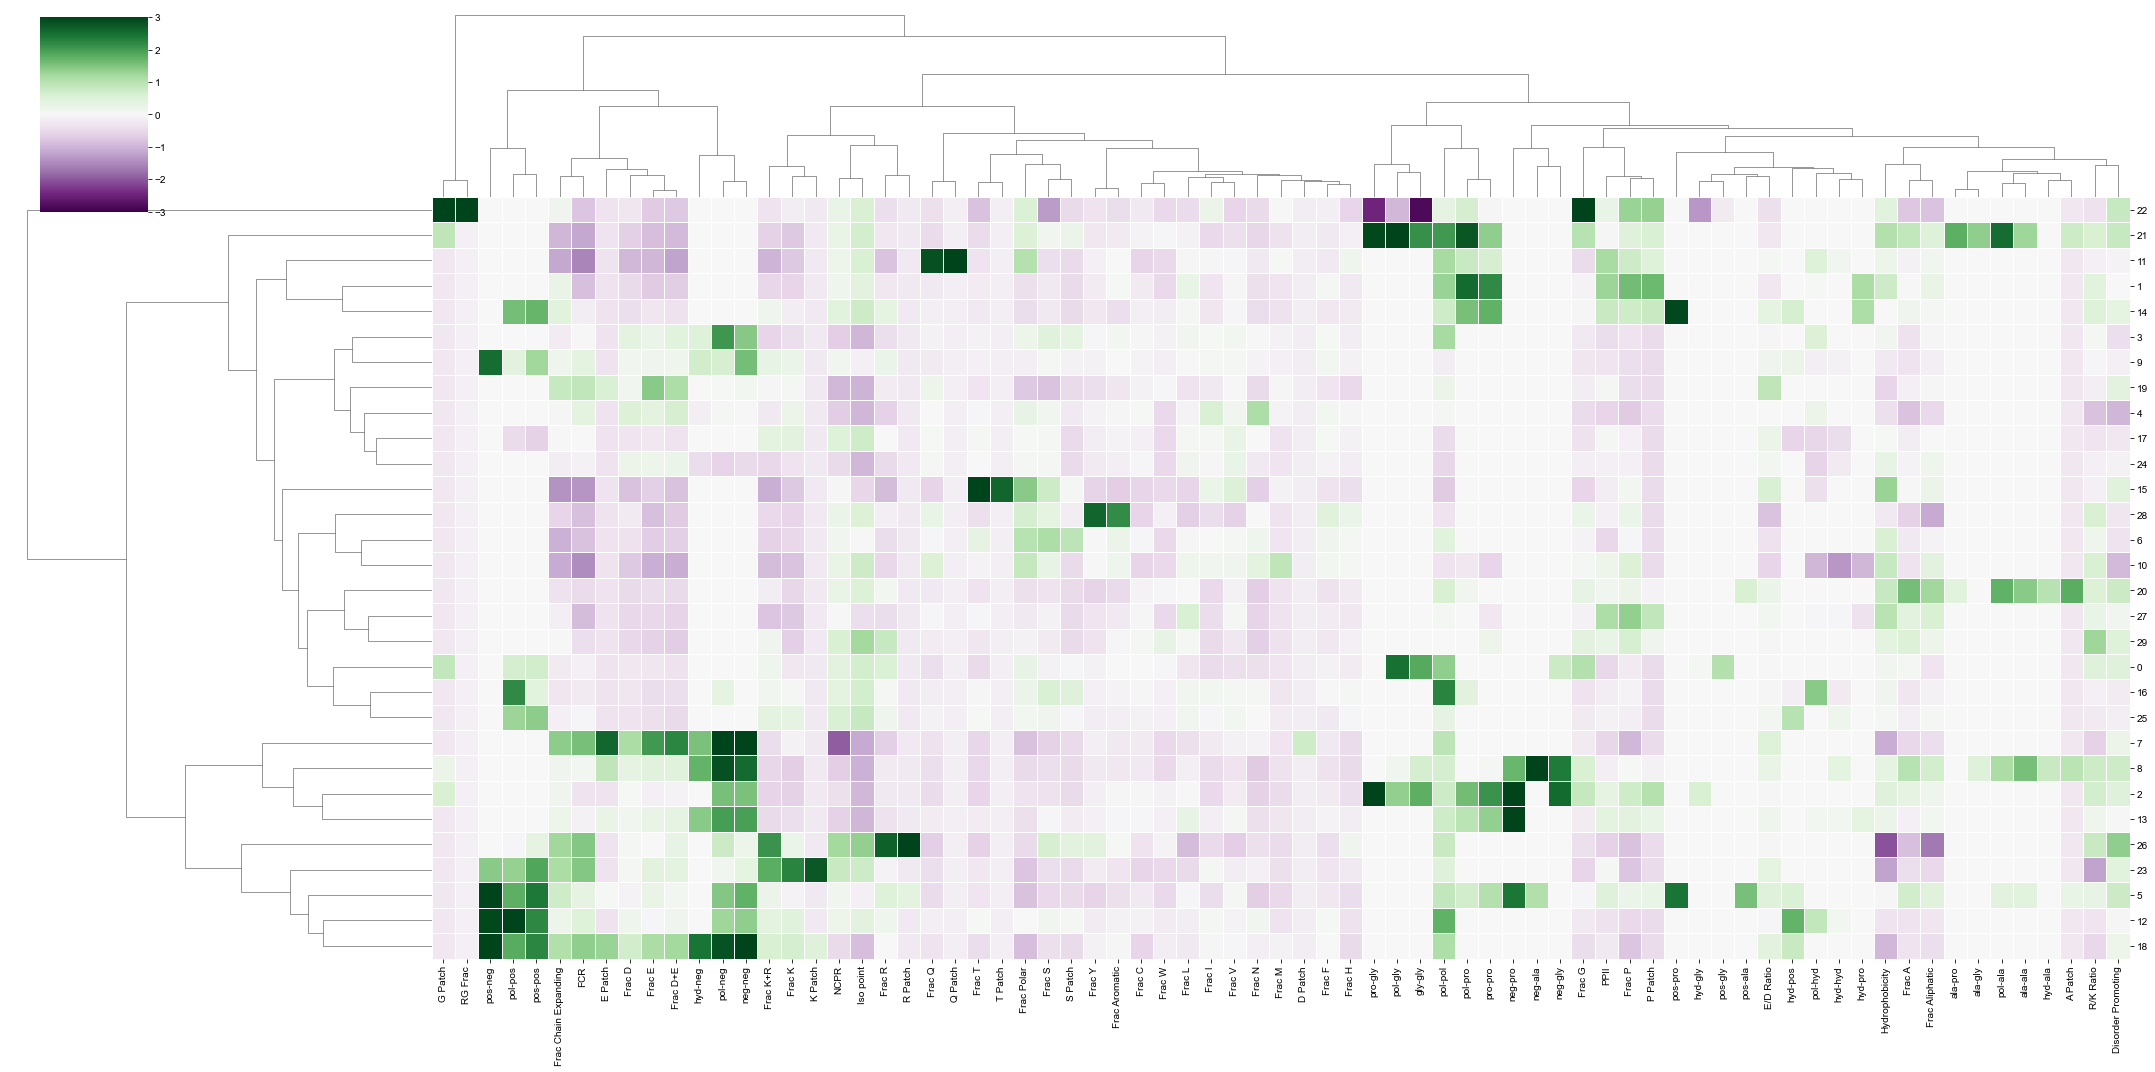

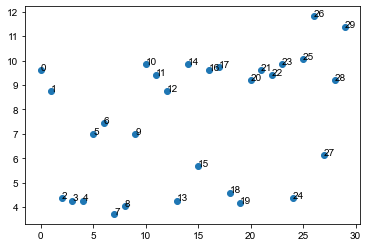

In [9]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.pyplot import gcf


# Extract just nucleolar IDRs
zvecaa_sub=zvecaa[allidx_sub,:]

medvalsbyclust=np.zeros((numkclusts,len(myfeat)))

for c in range(0,numkclusts):
    print('Cluster_'+str(c))
    currclustpos=[i for i, ltr in enumerate(clusters) if ltr == c]

    for p in range(0,len(myfeat)): 

        czvec=[]
        for idx in currclustpos:
            czvec.append(zvecaa_sub[idx,p])
            
        medvalsbyclust[c,p]=np.median(czvec)

p = [-3, -0.5, 0.5, 3]
f = lambda x: np.interp(x, p, [0, 0.5, 0.5, 1])

mycmap = LinearSegmentedColormap.from_list('map_white', 
              list(zip(np.linspace(0,1), plt.cm.PRGn(f(np.linspace(min(p), max(p)))))))
        
dfmed = pd.DataFrame(medvalsbyclust, columns=myfeat)
dfmed = dfmed.loc[:, dfmed.std() > 0.1]
med_clustmap = sbn.clustermap(dfmed, metric="euclidean", method="ward",cmap='PRGn',figsize=(30, 15),vmin=-3,vmax=3,linewidth=0.5) 
#med_clustmap = sbn.clustermap(dfmed, metric="euclidean", method="ward",cmap=mycmap,figsize=(30, 15),vmin=-3,vmax=3,linewidth=0.5) 
plt.setp(med_clustmap.ax_heatmap.get_yticklabels(),rotation=0)
medrowindex=med_clustmap.dendrogram_row.reordered_ind
print(medrowindex)

#plt.savefig('2023_09/IDR_'+str(minlength)+'_'+str(maxlength)+'_kmeans_'+str(numkclusts)+'_median_cluster_zscores.pdf', transparent=True, bbox_inches = "tight") 


meanvals_sapiens_all=np.load('data/sapiens_full_idrome_gte_30_compositional_mean.npy')
stdvals_sapiens_all=np.load('data/sapiens_full_idrome_gte_30_compositional_std.npy')

idx=myfeat.index('Iso point')
mediso=[]
for c in range(0,numkclusts):
    #print(medvalsbyclust[c,idx])
    #print(stdvals_sapiens_all[idx-len(myfeatnardini)])
    #print(meanvals_sapiens_all[idx-len(myfeatnardini)])
    tmp=medvalsbyclust[c,idx]*stdvals_sapiens_all[idx-len(myfeatnardini)]+meanvals_sapiens_all[idx-len(myfeatnardini)]
    print('Cluster_'+str(c)+': '+str(tmp))
    mediso.append(tmp)
    
print(np.argsort(mediso))
plt.figure()
plt.plot(mediso,'o')
for c in range(0,numkclusts):
    plt.text(c,mediso[c],c)


## 2.4 - Plot sorted median values above cutoff for a given cluster
Figures S2B-D, S3C-D, S5B-D

    Med z-scores  |Med z-scores| Sequence Features
7       2.483014        2.483014           pol-gly
35      1.842303        1.842303           gly-gly
0       1.381139        1.381139           pol-pol
20      1.042459        1.042459           pos-gly
41      1.040496        1.040496            Frac G
75      0.859416        0.859416           G Patch
25      0.769837        0.769837           neg-gly
    Med z-scores  |Med z-scores| Sequence Features
6       2.536067        2.536067           pol-pro
33      2.181300        2.181300           pro-pro
82      1.645776        1.645776           P Patch
48      1.598757        1.598757            Frac P
0       1.291328        1.291328           pol-pol
69      1.268817        1.268817              PPII
13      1.135621        1.135621           hyd-pro
64     -0.856533        0.856533               FCR
66      0.743542        0.743542    Hydrophobicity
39     -0.724316        0.724316            Frac E
    Med z-scores  |Med z-scores

   Med z-scores  |Med z-scores| Sequence Features
0      2.270356        2.270356           pol-pol
2      2.185519        2.185519           pol-pos
1      1.421990        1.421990           pol-hyd
    Med z-scores  |Med z-scores| Sequence Features
68      0.704029        0.704029         Iso point
    Med z-scores  |Med z-scores|     Sequence Features
16      4.725807        4.725807               pos-neg
21      3.291860        3.291860               neg-neg
3       2.825592        2.825592               pol-neg
10      2.429927        2.429927               hyd-neg
15      2.249133        2.249133               pos-pos
2       1.826200        1.826200               pol-pos
64      1.380081        1.380081                   FCR
73      1.295340        1.295340               E Patch
57      1.216317        1.216317              Frac D+E
39      1.141960        1.141960                Frac E
0       1.089364        1.089364               pol-pol
63      1.056345        1.056345  Frac

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


    Med z-scores  |Med z-scores|     Sequence Features
78      2.743568        2.743568               K Patch
44      2.261759        2.261759                Frac K
15      1.884310        1.884310               pos-pos
56      1.792342        1.792342              Frac K+R
64      1.459551        1.459551                   FCR
16      1.419375        1.419375               pos-neg
2       1.318484        1.318484               pol-pos
66     -1.203886        1.203886        Hydrophobicity
61     -1.200123        1.200123             R/K Ratio
63      1.126717        1.126717  Frac Chain Expanding
65      0.796772        0.796772                  NCPR
58     -0.794558        0.794558            Frac Polar
48     -0.790998        0.790998                Frac P
68      0.737656        0.737656             Iso point
    Med z-scores  |Med z-scores| Sequence Features
68     -0.943679        0.943679         Iso point
    Med z-scores  |Med z-scores| Sequence Features
15      1.385423      

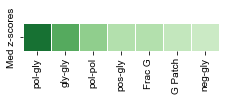

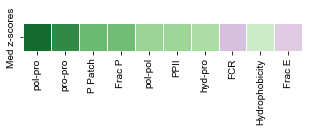

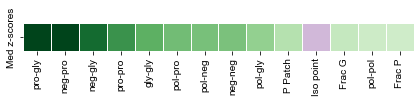

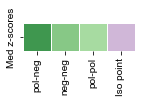

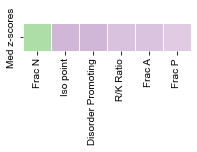

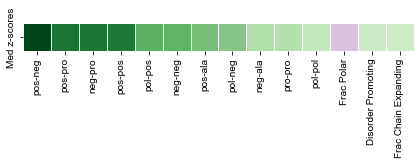

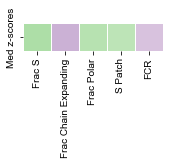

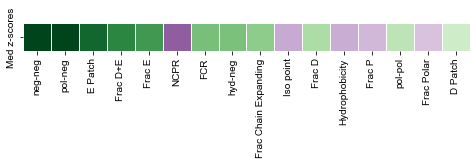

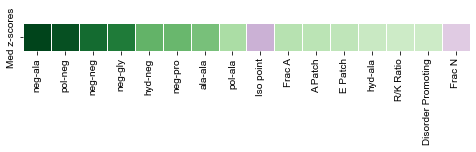

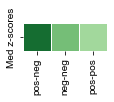

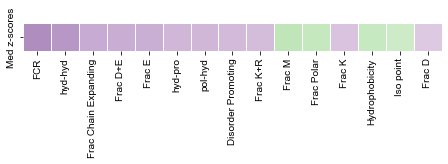

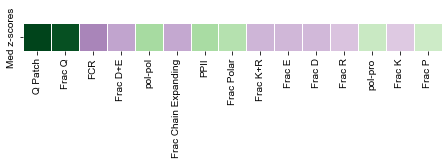

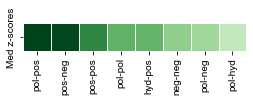

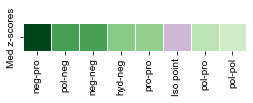

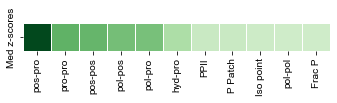

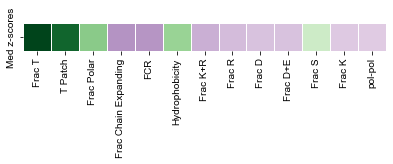

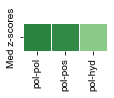

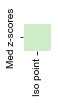

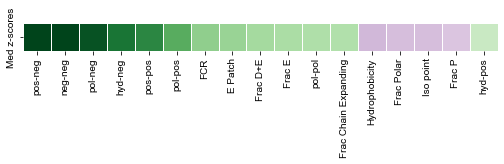

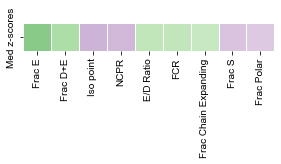

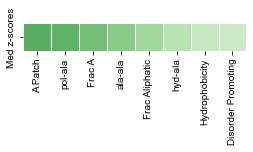

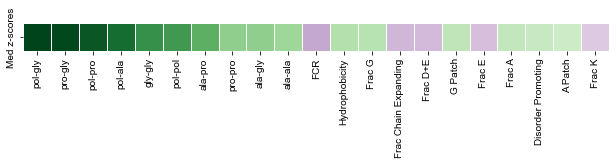

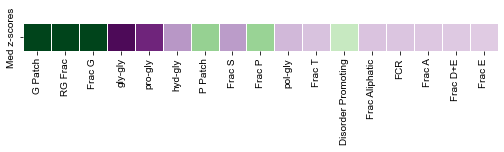

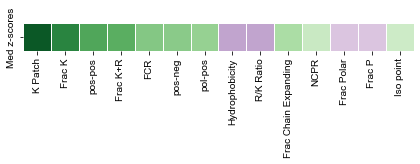

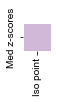

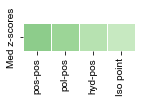

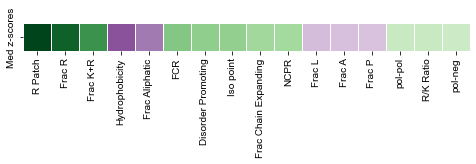

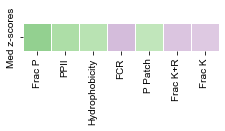

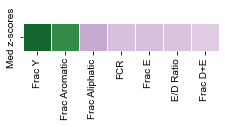

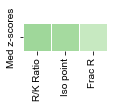

In [10]:
cutoffval=0.7
maxval=3
#currclust=1

for c in range(0,numkclusts):
    currclust=c

    dfmedbyclust=pd.DataFrame()
    dfmedbyclust['Med z-scores'] = medvalsbyclust[currclust,:];
    dfmedbyclust['|Med z-scores|'] = abs(medvalsbyclust[currclust,:]);
    dfmedbyclust['Sequence Features']=myfeat

    dfmedbyclust = dfmedbyclust[ (dfmedbyclust['|Med z-scores|'] >=cutoffval)]

    #print(dfmedbyclust)

    final_dfmedbyclust = dfmedbyclust.sort_values(by=['|Med z-scores|'], ascending=False)

    print(final_dfmedbyclust)
    mygroup=final_dfmedbyclust['Sequence Features'].tolist()

    f,axs = plt.subplots(1,1,figsize = (len(mygroup)/2, 10))
    sbn.heatmap(final_dfmedbyclust[['Med z-scores']].T,cmap='PRGn',cbar=False,ax=axs,vmin=-maxval,vmax=maxval,square=True,linewidth=1)
    plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 
    
    #plt.savefig('2023_09/Med_zscores_heatmaps/IDR_'+str(minlength)+'_'+str(maxlength)+'_kmeans_'+str(numkclusts)+'_median_cluster_'+str(currclust)+'_zscores_cutoff_'+str(cutoffval)+'.pdf', transparent=True, bbox_inches = "tight") 


## 2.5 - Plot median values above cutoff as heatmap

   Sequence Features         0         1         2         3         4  \
0            pol-pol  0.932172  1.185192  0.719348  0.728112  0.637274   
1            pol-hyd  0.000000  0.527857  0.106464  0.000000  0.000000   
2            pol-pos  0.000000  0.000000  0.000000  0.000000  0.000000   
3            pol-neg  2.999047  2.046093  1.991727  1.561869  2.836833   
4            pol-aro  0.000000  0.000000  0.000000  0.000000  0.000000   
..               ...       ...       ...       ...       ...       ...   
85           S Patch -0.481314  0.361967 -0.210661 -0.481314 -0.481314   
86           T Patch -0.146993 -0.146993 -0.146993 -0.146993 -0.146993   
87           V Patch -0.050940 -0.050940 -0.050940 -0.050940 -0.050940   
88           Y Patch -0.021541 -0.021541 -0.021541 -0.021541 -0.021541   
89           RG Frac -0.129896 -0.129896 -0.129896 -0.129896 -0.129896   

           5         6         7         8  ...        20        21        22  \
0   0.229559  0.066453 -0.5498

([<matplotlib.axis.YTick at 0x146666d4d790>,
 [Text(0, 0.5, '7'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '13'),
  Text(0, 3.5, '2'),
  Text(0, 4.5, '8'),
  Text(0, 5.5, '19'),
  Text(0, 6.5, '4'),
  Text(0, 7.5, '24'),
  Text(0, 8.5, '18'),
  Text(0, 9.5, '12'),
  Text(0, 10.5, '5'),
  Text(0, 11.5, '9'),
  Text(0, 12.5, '23'),
  Text(0, 13.5, '14'),
  Text(0, 14.5, '25'),
  Text(0, 15.5, '26'),
  Text(0, 16.5, '29'),
  Text(0, 17.5, '17'),
  Text(0, 18.5, '10'),
  Text(0, 19.5, '1'),
  Text(0, 20.5, '21'),
  Text(0, 21.5, '0'),
  Text(0, 22.5, '16'),
  Text(0, 23.5, '11'),
  Text(0, 24.5, '22'),
  Text(0, 25.5, '27'),
  Text(0, 26.5, '20'),
  Text(0, 27.5, '15'),
  Text(0, 28.5, '6'),
  Text(0, 29.5, '28')])

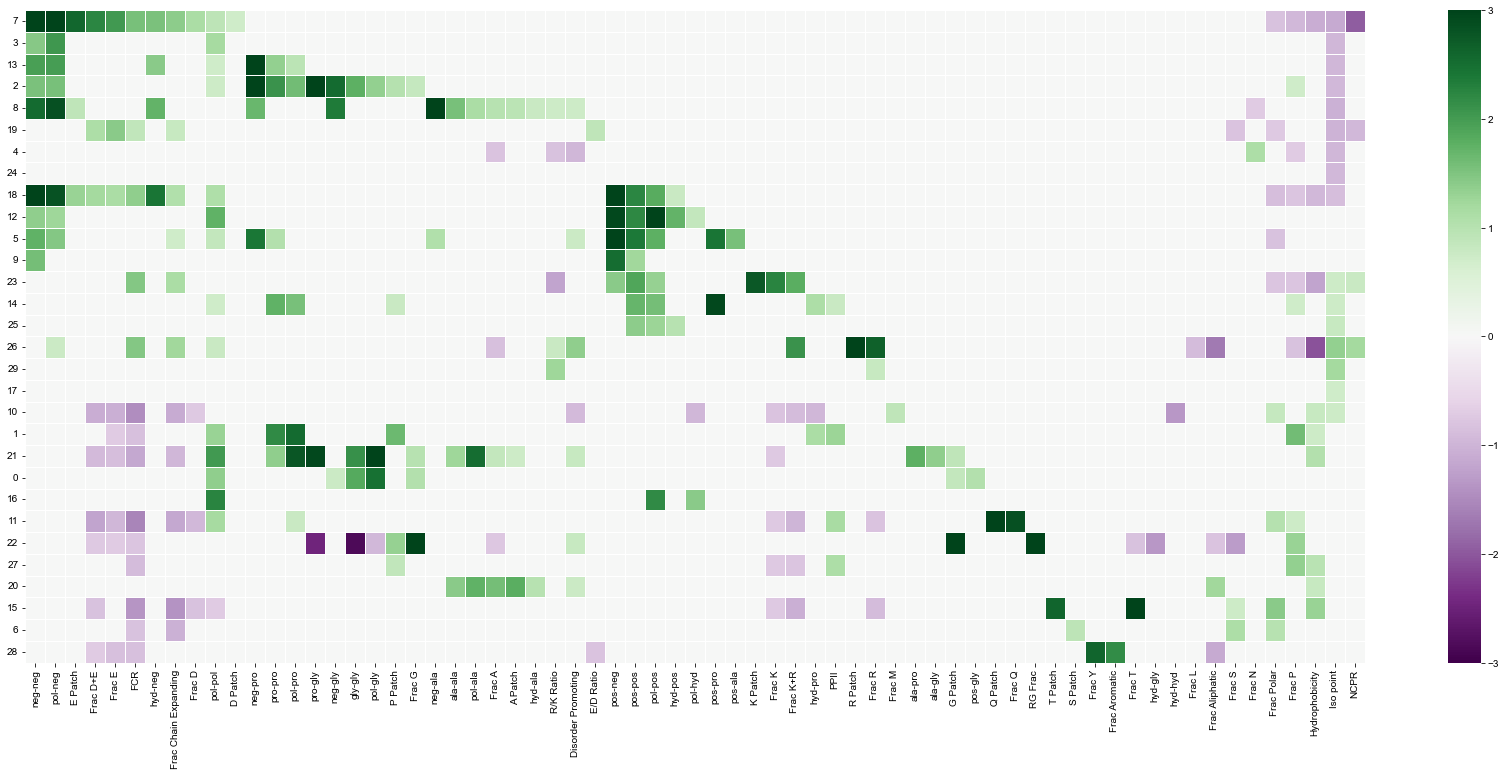

In [11]:
cutoffval=0.7 # if equal to 2 only showing features with p-value<0.01
maxval=3

# resort medvalsbyclust
medvalsbyclust2=np.zeros((numkclusts,len(myfeat)))

count=-1

myclists=[7, 3, 13, 2, 8, 19, 4, 24, 18, 12, 5, 9, 23, 14, 25, 26, 29, 17, 10, 1, 21, 0, 16, 11, 22, 27, 20, 15, 6, 28]
#tmplist=[18, 12, 5, 23, 26, 13, 2, 8, 7, 25, 16, 0, 29, 27, 20, 10, 6, 28, 15, 24, 17, 4, 19, 9, 3, 14, 1, 11, 21, 22]
for i in myclists:#reversed(medrowindex):
    count=count+1
    medvalsbyclust2[count,:]=medvalsbyclust[i,:]

dfmed2 = pd.DataFrame(medvalsbyclust2.T)

dffeature = pd.DataFrame(myfeat,columns =['Sequence Features'])
dfr = pd.concat([dffeature, dfmed2], axis=1)

print(dfr)
#hi

## Only save features that at least one cluster has a p-value > 0 ##
tmp=(abs(dfr.select_dtypes(include=['number'])) >= cutoffval).any(1)
dfr= dfr.loc[tmp==True]

## Set values below zero to zero ##
sortlist=[]
for i in range(0,numkclusts):
    dfr[i][abs(dfr[i])<cutoffval] = 0
    sortlist.append(i)

#sortlist=medrowindex
#print(sortlist)
#hi

final_dfr = dfr.sort_values(by=sortlist, ascending=False)
#final_dfr = dfr
#print(final_dfr)

final_dfr2=final_dfr;
mygroup=final_dfr2.pop('Sequence Features')
print(final_dfr2)

plt.figure(figsize=(30,12))
sbn.heatmap(final_dfr2.T,cmap='PRGn',cbar=True,vmin=-3,vmax=3,linewidth=0.5) 
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 
plt.yticks(np.arange(0.5, len(myclists), 1), myclists,rotation=0) 

#plt.savefig('2023_09/IDR_'+str(minlength)+'_'+str(maxlength)+'_kmeans_'+str(numkclusts)+'_sorted_median_cluster_zscores_cutoff_'+str(cutoffval)+'.pdf', transparent=True, bbox_inches = "tight") 


In [12]:
#print(tmplist)
print(mygroup.tolist())
print(len(mygroup))

['neg-neg', 'pol-neg', 'E Patch', 'Frac D+E', 'Frac E', 'FCR', 'hyd-neg', 'Frac Chain Expanding', 'Frac D', 'pol-pol', 'D Patch', 'neg-pro', 'pro-pro', 'pol-pro', 'pro-gly', 'neg-gly', 'gly-gly', 'pol-gly', 'P Patch', 'Frac G', 'neg-ala', 'ala-ala', 'pol-ala', 'Frac A', 'A Patch', 'hyd-ala', 'R/K Ratio', 'Disorder Promoting', 'E/D Ratio', 'pos-neg', 'pos-pos', 'pol-pos', 'hyd-pos', 'pol-hyd', 'pos-pro', 'pos-ala', 'K Patch', 'Frac K', 'Frac K+R', 'hyd-pro', 'PPII', 'R Patch', 'Frac R', 'Frac M', 'ala-pro', 'ala-gly', 'G Patch', 'pos-gly', 'Q Patch', 'Frac Q', 'RG Frac', 'T Patch', 'S Patch', 'Frac Y', 'Frac Aromatic', 'Frac T', 'hyd-gly', 'hyd-hyd', 'Frac L', 'Frac Aliphatic', 'Frac S', 'Frac N', 'Frac Polar', 'Frac P', 'Hydrophobicity', 'Iso point', 'NCPR']
67


## 2.6 - Plot median values above cutoff as heatmap reordered
Figure 1B

   Sequence Features         0         1         2         3         4  \
0               NCPR -1.963751 -0.657096 -0.622591 -0.396497 -0.661477   
1          Iso point -1.145439 -0.977305 -0.977305 -0.943679 -1.044559   
2            neg-neg  3.769643  1.434620  1.945428  1.538196  2.552639   
3            pol-neg  2.999047  2.046093  1.991727  1.561869  2.836833   
4            hyd-neg  1.535408  0.507602  1.425990  0.000000  1.731099   
..               ...       ...       ...       ...       ...       ...   
62           hyd-gly  0.000000  0.000000  0.000000  0.595244  0.000000   
63            Frac M -0.323531 -0.107034 -0.303297 -0.453374 -0.363955   
64            Frac L -0.392457  0.134696  0.308170 -0.023278 -0.149698   
65    Frac Aliphatic -0.413492 -0.046822  0.113401  0.186867  0.658736   
66    Hydrophobicity -1.089734  0.124587  0.250813  0.468942  0.366640   

           5         6         7         8  ...        20        21        22  \
0  -0.954589 -0.699616 -0.4761

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


([<matplotlib.axis.YTick at 0x146663fe2790>,
 [Text(0, 0.5, '7'),
  Text(0, 1.5, '3'),
  Text(0, 2.5, '13'),
  Text(0, 3.5, '2'),
  Text(0, 4.5, '8'),
  Text(0, 5.5, '19'),
  Text(0, 6.5, '4'),
  Text(0, 7.5, '24'),
  Text(0, 8.5, '18'),
  Text(0, 9.5, '12'),
  Text(0, 10.5, '5'),
  Text(0, 11.5, '9'),
  Text(0, 12.5, '23'),
  Text(0, 13.5, '14'),
  Text(0, 14.5, '25'),
  Text(0, 15.5, '26'),
  Text(0, 16.5, '29'),
  Text(0, 17.5, '17'),
  Text(0, 18.5, '10'),
  Text(0, 19.5, '1'),
  Text(0, 20.5, '21'),
  Text(0, 21.5, '27'),
  Text(0, 22.5, '22'),
  Text(0, 23.5, '0'),
  Text(0, 24.5, '20'),
  Text(0, 25.5, '16'),
  Text(0, 26.5, '11'),
  Text(0, 27.5, '15'),
  Text(0, 28.5, '6'),
  Text(0, 29.5, '28')])

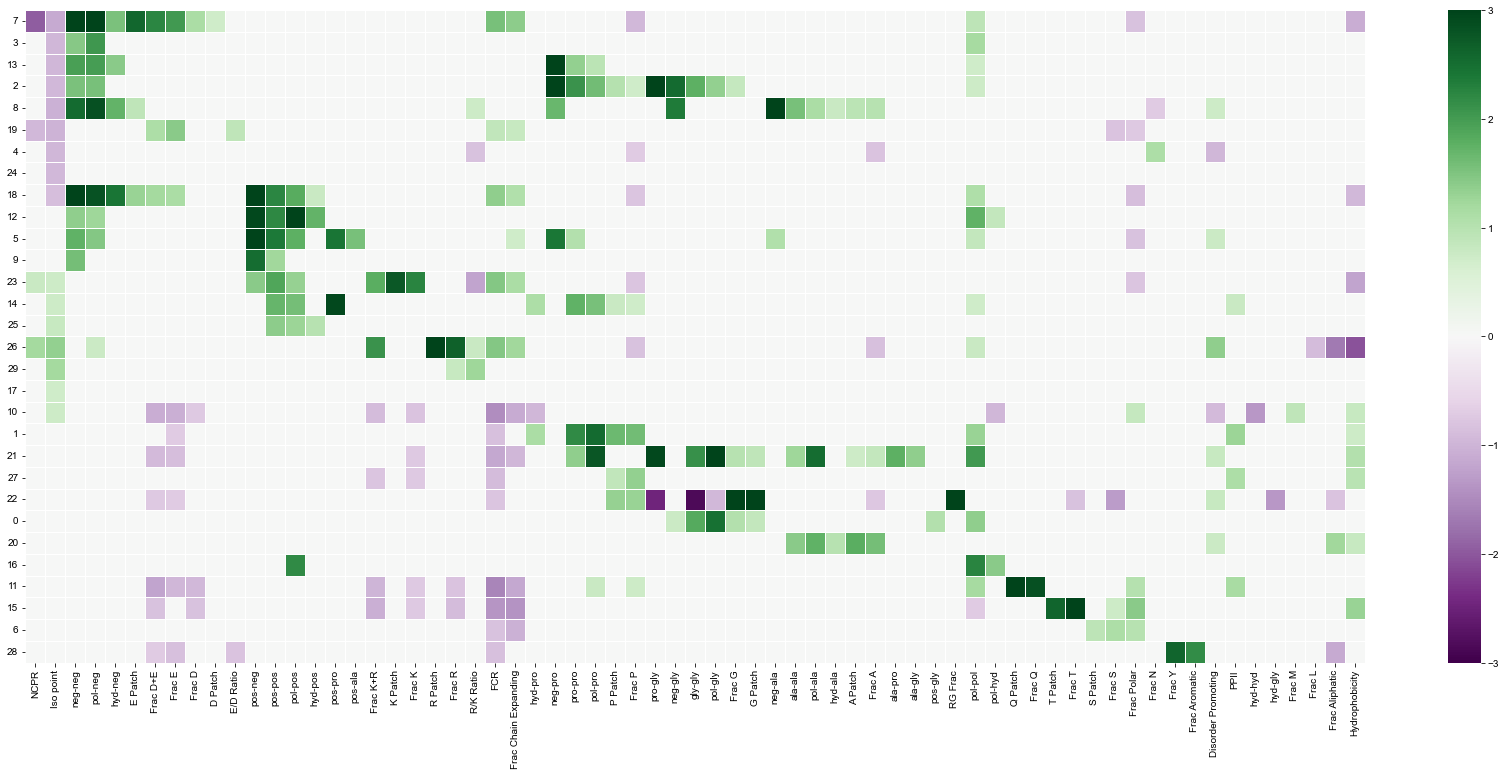

In [16]:
cutoffval=0.70
maxval=3

myfeatorder=['NCPR','Iso point','neg-neg', 'pol-neg', 'hyd-neg','E Patch', 'Frac D+E', 'Frac E', 'Frac D', 'D Patch','E/D Ratio', 'pos-neg', 'pos-pos', 'pol-pos', 'hyd-pos', 'pos-pro', 'pos-ala', 'Frac K+R', 'K Patch', 'Frac K', 'R Patch', 'Frac R', 'R/K Ratio', 'FCR', 'Frac Chain Expanding', 'hyd-pro', 'neg-pro', 'pro-pro', 'pol-pro', 'P Patch', 'Frac P', 'pro-gly', 'neg-gly', 'gly-gly', 'pol-gly', 'Frac G', 'G Patch', 'neg-ala', 'ala-ala', 'pol-ala', 'hyd-ala', 'A Patch', 'Frac A', 'ala-pro', 'ala-gly', 'pos-gly', 'RG Frac', 'pol-pol', 'pol-hyd', 'Q Patch', 'Frac Q', 'T Patch', 'Frac T', 'S Patch', 'Frac S', 'Frac Polar', 'Frac N', 'Frac Y', 'Frac Aromatic', 'Disorder Promoting', 'PPII', 'hyd-hyd', 'hyd-gly', 'Frac M', 'Frac L', 'Frac Aliphatic', 'Hydrophobicity']
myclustorder=[7, 3, 13, 2, 8, 19, 4, 24, 18, 12, 5, 9, 23, 14, 25, 26, 29, 17, 10, 1, 21, 27, 22, 0, 20, 16, 11, 15, 6, 28]

# resort medvalsbyclust
medvalsbyclust3=np.zeros((numkclusts,len(myfeatorder)))

count=-1
for i in myclustorder:
    count=count+1
    count2=-1
    for j in range(0,len(myfeatorder)):
        pos=myfeat.index(myfeatorder[j])
        count2=count2+1
        medvalsbyclust3[count,count2]=medvalsbyclust[i,pos]
        
dfmed3 = pd.DataFrame(medvalsbyclust3.T)

dffeature = pd.DataFrame(myfeatorder,columns =['Sequence Features'])
dfr3 = pd.concat([dffeature, dfmed3], axis=1)

dfr3.to_excel('../Supplementary_Tables/Table_S1.xlsx',sheet_name='Fig_1B')

print(dfr3)
#hi

## Only save features that at least one cluster has a p-value > 0 ##
tmp=(abs(dfr3.select_dtypes(include=['number'])) >= cutoffval).any(1)
dfr3= dfr3.loc[tmp==True]

## Set values below zero to zero ##
for i in range(0,numkclusts):
    dfr3[i][abs(dfr3[i])<cutoffval] = 0


final_dfr3=dfr3;
mygroup=final_dfr3.pop('Sequence Features')
print(final_dfr3)

plt.figure(figsize=(30,12))
sbn.heatmap(final_dfr3.T,cmap='PRGn',cbar=True,vmin=-maxval,vmax=maxval,linewidth=0.5) 
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 
plt.yticks(np.arange(0.5, len(myclustorder), 1), myclustorder,rotation=0) 

#plt.savefig('2023_09/IDR_'+str(minlength)+'_'+str(maxlength)+'_kmeans_'+str(numkclusts)+'_my_sorted_median_cluster_zscores_cutoff_'+str(cutoffval)+'.pdf', transparent=True, bbox_inches = "tight") 

In [18]:
tmpdf=pd.read_excel('../Supplementary_Tables/Table_S1.xlsx')
print(tmpdf)

    Unnamed: 0 Sequence Features         0         1         2         3  \
0            0              NCPR -1.963751 -0.657096 -0.622591 -0.396497   
1            1         Iso point -1.145439 -0.977305 -0.977305 -0.943679   
2            2           neg-neg  3.769643  1.434620  1.945428  1.538196   
3            3           pol-neg  2.999047  2.046093  1.991727  1.561869   
4            4           hyd-neg  1.535408  0.507602  1.425990  0.000000   
..         ...               ...       ...       ...       ...       ...   
62          62           hyd-gly  0.000000  0.000000  0.000000  0.595244   
63          63            Frac M -0.323531 -0.107034 -0.303297 -0.453374   
64          64            Frac L -0.392457  0.134696  0.308170 -0.023278   
65          65    Frac Aliphatic -0.413492 -0.046822  0.113401  0.186867   
66          66    Hydrophobicity -1.089734  0.124587  0.250813  0.468942   

           4         5         6         7  ...        20        21        22  \
0  -0.